<a href="https://colab.research.google.com/github/financieras/big_data/blob/main/retos/reto_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 5. Filtros y consultas básicas**
- Filtra pasajeros de primera clase que sobrevivieron: `df[(df['class']=='First') & (df['survived']==1)]`
- Encuentra pasajero más joven con `df.loc[df['age'].idxmin()]`
- Encuentra pasajero más viejo
- Calcula tarifa promedio por clase con `.groupby('class')['fare'].mean()`

# **Resolución del Reto 5**

## **Paso 1: Importar librerías y cargar dataset**


In [ ]:
# EJECUTA ESTE CÓDIGO PARA CARGAR EL DATASET
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("📦 Paso 1: Cargando dataset Titanic...")
df = sns.load_dataset('titanic')
print("✅ Dataset cargado correctamente")

print(f"📊 Dimensiones: {df.shape}")
print("👀 Primeras filas del dataset:")
df.head()

📦 Paso 1: Cargando dataset Titanic...
✅ Dataset cargado correctamente
📊 Dimensiones: (891, 15)
👀 Primeras filas del dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Paso 2: Filtrar pasajeros de primera clase que sobrevivieron**

In [ ]:
# EJECUTA ESTE CÓDIGO PARA FILTRAR PRIMERA CLASE QUE SOBREVIVIERON
print("🎫 Paso 2: Filtrando pasajeros de primera clase que sobrevivieron...")

# Crear el filtro combinado
filtro_primera_clase_sobrevivientes = df[(df['class'] == 'First') & (df['survived'] == 1)]

print(f"📊 Resultados del filtro:")
print(f"   - Total de pasajeros de primera clase que sobrevivieron: {len(filtro_primera_clase_sobrevivientes)}")
print(f"   - Porcentaje sobre total de primera clase: {len(filtro_primera_clase_sobrevivientes)/len(df[df['class']=='First'])*100:.1f}%")

print(f"\n👥 Información demográfica:")
print(f"   - Mujeres: {len(filtro_primera_clase_sobrevivientes[filtro_primera_clase_sobrevivientes['sex']=='female'])}")
print(f"   - Hombres: {len(filtro_primera_clase_sobrevivientes[filtro_primera_clase_sobrevivientes['sex']=='male'])}")
print(f"   - Edad promedio: {filtro_primera_clase_sobrevivientes['age'].mean():.1f} años")

print(f"\n📋 Muestra de pasajeros de primera clase que sobrevivieron:")
filtro_primera_clase_sobrevivientes[['survived', 'class', 'sex', 'age', 'fare']].head(8)

🎫 Paso 2: Filtrando pasajeros de primera clase que sobrevivieron...
📊 Resultados del filtro:
   - Total de pasajeros de primera clase que sobrevivieron: 136
   - Porcentaje sobre total de primera clase: 63.0%

👥 Información demográfica:
   - Mujeres: 91
   - Hombres: 45
   - Edad promedio: 35.4 años

📋 Muestra de pasajeros de primera clase que sobrevivieron:


,survived,class,sex,age,fare
1,1,First,female,38.0,71.2833
3,1,First,female,35.0,53.1000
11,1,First,female,58.0,26.5500
23,1,First,male,28.0,35.5000
31,1,First,female,NaN,146.5208
52,1,First,female,49.0,76.7292
55,1,First,male,NaN,35.5000
61,1,First,female,38.0,80.0000


## **Paso 3: Encontrar el pasajero más joven**

In [ ]:
# EJECUTA ESTE CÓDIGO PARA ENCONTRAR PASAJERO MÁS JOVEN
print("👶 Paso 3: Buscando el pasajero más joven...")

# Encontrar índice del pasajero más joven
indice_mas_joven = df['age'].idxmin()
pasajero_mas_joven = df.loc[indice_mas_joven]

print("🎯 Pasajero más joven del Titanic:")
print(f"   - Edad: {pasajero_mas_joven['age']} años")
print(f"   - Nombre: {pasajero_mas_joven['who']}")
print(f"   - Sexo: {pasajero_mas_joven['sex']}")
print(f"   - Clase: {pasajero_mas_joven['class']}")
print(f"   - Supervivió: {'Sí' if pasajero_mas_joven['survived'] == 1 else 'No'}")
print(f"   - Tarifa: ${pasajero_mas_joven['fare']:.2f}")

# Mostrar información completa
print(f"\n📄 Información completa del pasajero más joven:")
print(pasajero_mas_joven[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who']])


👶 Paso 3: Buscando el pasajero más joven...
🎯 Pasajero más joven del Titanic:
   - Edad: 0.42 años
   - Nombre: child
   - Sexo: male
   - Clase: Third
   - Supervivió: Sí
   - Tarifa: $8.52

📄 Información completa del pasajero más joven:
survived         1
pclass           3
sex           male
age           0.42
sibsp            0
parch            1
fare        8.5167
embarked         C
class        Third
who          child
Name: 803, dtype: object


## **Paso 4: Encontrar el pasajero más viejo**

In [ ]:
# EJECUTA ESTE CÓDIGO PARA ENCONTRAR PASAJERO MÁS VIEJO
print("👴 Paso 4: Buscando el pasajero más viejo...")

# Encontrar índice del pasajero más viejo
indice_mas_viejo = df['age'].idxmax()
pasajero_mas_viejo = df.loc[indice_mas_viejo]

print("🎯 Pasajero más viejo del Titanic:")
print(f"   - Edad: {pasajero_mas_viejo['age']} años")
print(f"   - Nombre: {pasajero_mas_viejo['who']}")
print(f"   - Sexo: {pasajero_mas_viejo['sex']}")
print(f"   - Clase: {pasajero_mas_viejo['class']}")
print(f"   - Supervivió: {'Sí' if pasajero_mas_viejo['survived'] == 1 else 'No'}")
print(f"   - Tarifa: ${pasajero_mas_viejo['fare']:.2f}")

# Mostrar información completa
print(f"\n📄 Información completa del pasajero más viejo:")
print(pasajero_mas_viejo[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who']])

👴 Paso 4: Buscando el pasajero más viejo...
🎯 Pasajero más viejo del Titanic:
   - Edad: 80.0 años
   - Nombre: man
   - Sexo: male
   - Clase: First
   - Supervivió: Sí
   - Tarifa: $30.00

📄 Información completa del pasajero más viejo:
survived        1
pclass          1
sex          male
age          80.0
sibsp           0
parch           0
fare         30.0
embarked        S
class       First
who           man
Name: 630, dtype: object


## **Paso 5: Comparativa jóvenes vs mayores**

📊 Paso 5: Comparativa entre pasajeros jóvenes y mayores...


/tmp/ipython-input-1556100139.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  supervivencia_por_edad = df.groupby('age_group')['survived'].mean()


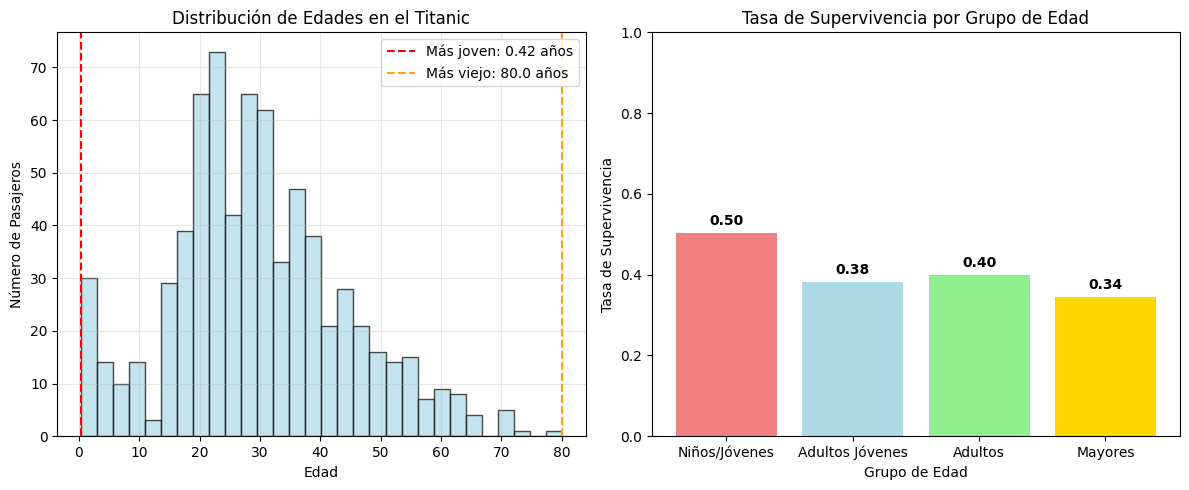

In [ ]:
# EJECUTA ESTE CÓDIGO PARA COMPARATIVA
print("📊 Paso 5: Comparativa entre pasajeros jóvenes y mayores...")

# Crear visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Distribución de edades
axes[0].hist(df['age'].dropna(), bins=30, color='lightblue', edgecolor='black', alpha=0.7)
axes[0].axvline(pasajero_mas_joven['age'], color='red', linestyle='--', label=f'Más joven: {pasajero_mas_joven["age"]} años')
axes[0].axvline(pasajero_mas_viejo['age'], color='orange', linestyle='--', label=f'Más viejo: {pasajero_mas_viejo["age"]} años')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Número de Pasajeros')
axes[0].set_title('Distribución de Edades en el Titanic')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Supervivencia por grupo de edad
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 80], labels=['Niños/Jóvenes', 'Adultos Jóvenes', 'Adultos', 'Mayores'])
supervivencia_por_edad = df.groupby('age_group')['survived'].mean()

axes[1].bar(supervivencia_por_edad.index, supervivencia_por_edad.values, color=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
axes[1].set_xlabel('Grupo de Edad')
axes[1].set_ylabel('Tasa de Supervivencia')
axes[1].set_title('Tasa de Supervivencia por Grupo de Edad')
axes[1].set_ylim(0, 1)
for i, v in enumerate(supervivencia_por_edad.values):
    axes[1].text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Limpiar columna temporal
df.drop('age_group', axis=1, inplace=True)

## **Paso 6: Calcular tarifa promedio por clase**

💰 Paso 6: Calculando tarifa promedio por clase...
📈 Tarifa promedio por clase:
   - Clase First: $84.15
   - Clase Second: $20.66
   - Clase Third: $13.68

📊 Estadísticas adicionales de tarifas:
   Clase   |   Promedio   |   Mediana   |   Máxima
   ---------------------------------------------
   First  |   $   84.15 |   $  60.29 |   $ 512.33
   Second |   $   20.66 |   $  14.25 |   $  73.50
   Third  |   $   13.68 |   $   8.05 |   $  69.55


/tmp/ipython-input-828004528.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tarifa_promedio_clase = df.groupby('class')['fare'].mean()
/tmp/ipython-input-828004528.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tarifa_mediana_clase = df.groupby('class')['fare'].median()
/tmp/ipython-input-828004528.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tarifa_max_clase = df.groupby('class')['fare'].max()
/tmp/ip

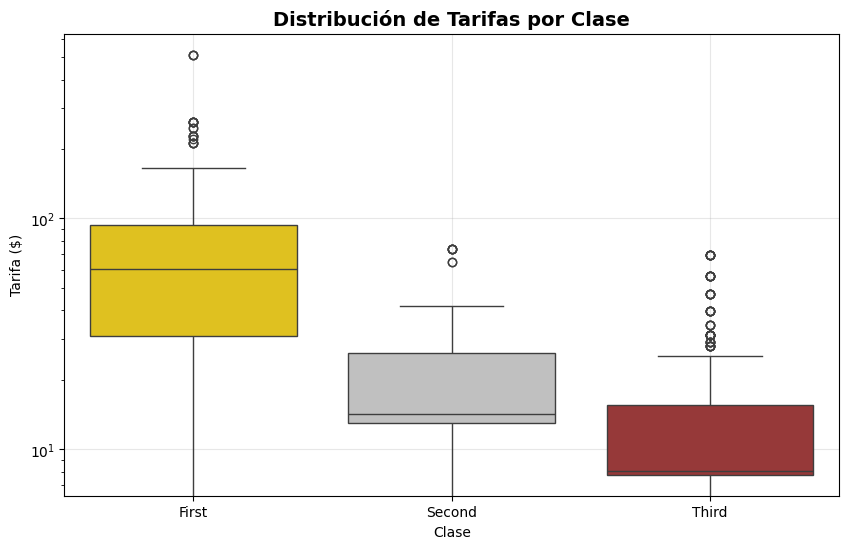

In [ ]:
# EJECUTA ESTE CÓDIGO PARA TARIFA PROMEDIO POR CLASE
print("💰 Paso 6: Calculando tarifa promedio por clase...")

# Calcular tarifa promedio por clase
tarifa_promedio_clase = df.groupby('class')['fare'].mean()

print("📈 Tarifa promedio por clase:")
for clase, tarifa in tarifa_promedio_clase.items():
    print(f"   - Clase {clase}: ${tarifa:.2f}")

# Calcular estadísticas adicionales
tarifa_mediana_clase = df.groupby('class')['fare'].median()
tarifa_max_clase = df.groupby('class')['fare'].max()

print(f"\n📊 Estadísticas adicionales de tarifas:")
print("   Clase   |   Promedio   |   Mediana   |   Máxima")
print("   " + "-" * 45)
for clase in tarifa_promedio_clase.index:
    print(f"   {clase:6} |   ${tarifa_promedio_clase[clase]:8.2f} |   ${tarifa_mediana_clase[clase]:7.2f} |   ${tarifa_max_clase[clase]:7.2f}")

# Visualización de tarifas por clase
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='fare', data=df, palette=['gold', 'silver', 'brown'])
plt.title('Distribución de Tarifas por Clase', fontsize=14, fontweight='bold')
plt.xlabel('Clase')
plt.ylabel('Tarifa ($)')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.grid(True, alpha=0.3)
plt.show()

## **Paso 7: Resumen ejecutivo de consultas**

In [ ]:
# EJECUTA ESTE CÓDIGO PARA RESUMEN FINAL
print("🎯 Paso 7: Resumen ejecutivo de consultas realizadas")

print("\n" + "="*70)
print("                 RESUMEN - CONSULTAS Y FILTROS TITANIC")
print("="*70)

print(f"\n🔍 CONSULTAS REALIZADAS:")

print(f"\n🎫 1. FILTRO: Primera clase que sobrevivió")
print(f"   - Resultados: {len(filtro_primera_clase_sobrevivientes)} pasajeros")
print(f"   - Tasa de supervivencia en primera clase: {len(filtro_primera_clase_sobrevivientes)/len(df[df['class']=='First'])*100:.1f}%")

print(f"\n👶 2. PASAJERO MÁS JOVEN")
print(f"   - Edad: {pasajero_mas_joven['age']} años")
print(f"   - Clase: {pasajero_mas_joven['class']}")
print(f"   - Supervivió: {'Sí' if pasajero_mas_joven['survived'] == 1 else 'No'}")

print(f"\n👴 3. PASAJERO MÁS VIEJO")
print(f"   - Edad: {pasajero_mas_viejo['age']} años")
print(f"   - Clase: {pasajero_mas_viejo['class']}")
print(f"   - Supervivió: {'Sí' if pasajero_mas_viejo['survived'] == 1 else 'No'}")

print(f"\n💰 4. TARIFAS PROMEDIO POR CLASE")
for clase, tarifa in tarifa_promedio_clase.items():
    print(f"   - Clase {clase}: ${tarifa:.2f}")

print(f"\n📈 HALLAZGOS INTERESANTES:")
diferencia_tarifas = tarifa_promedio_clase['First'] / tarifa_promedio_clase['Third']
print(f"   - La primera clase pagó {diferencia_tarifas:.1f}x más que la tercera clase")
print(f"   - Rango de edades: {pasajero_mas_joven['age']} - {pasajero_mas_viejo['age']} años")
print(f"   - Diferencia de edad: {pasajero_mas_viejo['age'] - pasajero_mas_joven['age']:.1f} años")

print(f"\n✅ TÉCNICAS APRENDIDAS:")
print(f"   - Filtros booleanos con condiciones múltiples")
print(f"   - Búsqueda de valores extremos (idxmin/idxmax)")
print(f"   - Agregaciones con groupby")
print(f"   - Acceso a filas específicas con loc")

print(f"\n🎉 ¡Reto 5 completado! Consultas y filtros dominados")
print("="*70)

## 🎯 **Habilidades desarrolladas en este reto:**

1. **Filtros booleanos**: Base del análisis de datos selectivo
2. **Búsqueda de extremos**: Identificación de casos límite
3. **Agregaciones por grupo**: Análisis comparativo entre categorías
4. **Visualización de resultados**: Comunicación efectiva de hallazgos
5. **Interpretación contextual**: Transformar datos en insights